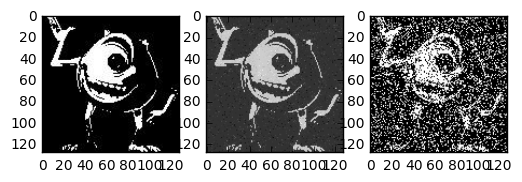

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy import signal
def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] = im2[index] + e[index]
    return im2
def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2


def heightWidth(image):
    #width is the bigger one, the second one
    return image.shape[0], image.shape[1]

# proportion of pixels to alter
prop = 0.2
varSigma = 0.1
im = imread("../images/mike_grey_resize.jpg")
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
im2 = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')
im2 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im2,cmap='gray')

In [19]:
def neighbours(i,j,M,N,size=4):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    if size==8:
        print('Not yet implemented\n')
        #expand this to include diagonal elements
        return -1

(96, 128)
[[-1. -1. -1. ...,  1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1.  1. ..., -1. -1.  1.]
 ..., 
 [-1. -1.  1. ...,  1.  1.  1.]
 [-1. -1. -1. ...,  1. -1.  1.]
 [-1. -1. -1. ...,  1.  1.  1.]]
initialised X i.e. latent image


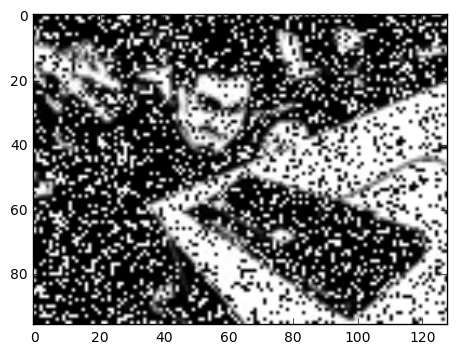

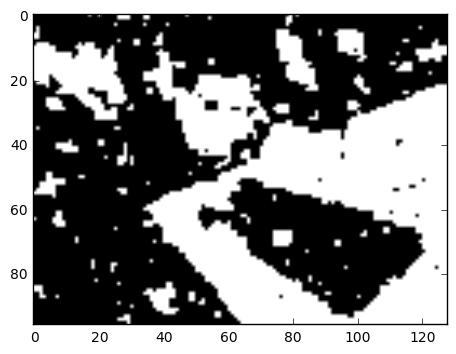

one iteration of ICM done


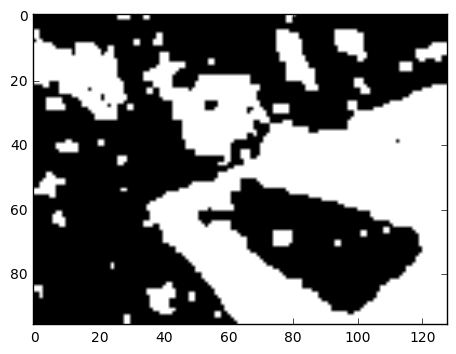

one iteration of ICM done
We compeleted  2  iterations
False
1.0
1.0
0.0


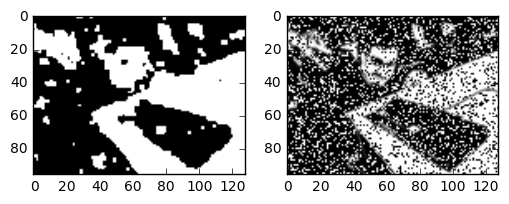

In [17]:
print(im2.shape)
latent_im2 = np.copy(im2)
# print(im2.item((34, 123)))
# print(im2.item((36, 123)))
# print(im2.item((33, 45)))
    
def bookEnergy(image, xImage, point):
    #last term
    height, width = heightWidth(image)
    
    kernel = np.array([[0,1,0],
                       [1,0,1],
                       [0,1,0]])
    xImage[point] = 1
    XY_multiplied_pos = np.multiply(image, xImage)
    finalSumPos = np.sum(XY_multiplied_pos)
    XN_convolved_pos = signal.convolve2d(xImage, kernel, mode='same')
    XN_multiplied_pos = np.multiply(xImage, XN_convolved_pos)
    middleSumPos = np.sum(XN_multiplied_pos)
    
    xImage[point] = -1
    XY_multiplied_neg = np.multiply(image, xImage)    
    finalSumNeg = np.sum(XY_multiplied_neg)
    XN_convolved_neg = signal.convolve2d(xImage, kernel, mode='same')
    XN_multiplied_neg = np.multiply(xImage, XN_convolved_neg)
    middleSumNeg = np.sum(XN_multiplied_neg)   
#     middleSumPos = 0
#     middleSumNeg = 0
    totalSumPos = finalSumPos + middleSumPos
    totalSumNeg = finalSumNeg + middleSumNeg
    return totalSumPos/10000, totalSumNeg/10000
    
def jointProb(image, xImage, point):
    Z = 1
    posEnergy, negEnergy = bookEnergy(image, xImage, point)
    posVal = 1/Z * np.exp(posEnergy)
    negVal = 1/Z * np.exp(negEnergy)
    return posVal, negVal
    
def ICM(image):
    #set all the x variables to be = y variables
    #i.e. all the latent variables initialised as the image output
    H, W = heightWidth(image)
    X = np.copy(image)
    X[X > 0.5] = 1
    X[X <= 0.5] = -1
    print(X)
    print("initialised X i.e. latent image")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(im2,cmap='gray')
    plt.show()
    for iterations in range(2):
        flag = False
        for i in range(H):
            for j in range(W):
                point = (i,j)
                probPos, probNeg = jointProb(image, X, point)
                if(probPos > probNeg):
                    if(X[point] == -1):
                        flag = True
                        X[point] = 1
                elif(probNeg > probPos):
                    if(X[point] == 1):
                        print("yah")
                        flag = True
                        X[point] = -1
        fig2 = plt.figure()
        ax2 = fig2.add_subplot(111)
        ax2.imshow(X,cmap='gray')
        plt.show()
        if(flag == False):
            print("bail early")
            break
        print("one iteration of ICM done")
    print("We compeleted ", iterations+1, " iterations")
    
    X[X != 1] = 0
    
    return X

imFIXED = ICM(im2)

print(np.array_equal(im2, imFIXED))

print(imFIXED.item((34, 123)))
print(imFIXED.item((36, 123)))
print(imFIXED.item((33, 45)))

fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(imFIXED,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(im2,cmap='gray')
plt.show()

In [20]:
kernel = np.array([[0,1,0],
                   [1,0,1],
                   [0,1,0]])

array = np.array([[ 1, -1,  1,  1, -1,  1],
                 [ -1,  1, -1,  1,  1, -1],
                 [  1,  1,  1,  1, -1, -1],
                 [  1,  1,  1,  1,  1,  1]])

point = (3, 5)

array[point] = -1
print("\n", array, "\n")
convol = signal.convolve2d(array, kernel, mode='same')
final = np.multiply(array, convol)
print(final)

h, w = heightWidth(array)

itSum = 0
for i in range(h):
    for j in range(w):
        ns = neighbours(i, j, h, w, size=4)
        for n in ns:
            itSum += array[n] * array[(i,j)]
            
print(itSum)
print(np.sum(final))

array[point] = -1
print("\n", array, "\n")
print(signal.convolve2d(array, kernel, mode='same'))
print(array[point])



 [[ 1 -1  1  1 -1  1]
 [-1  1 -1  1  1 -1]
 [ 1  1  1  1 -1 -1]
 [ 1  1  1  1  1 -1]] 

[[-2 -3 -1  1 -3 -2]
 [-3 -2 -4  2 -2 -1]
 [ 1  4  2  2 -2  3]
 [ 2  3  3  3 -1  0]]
0
0

 [[ 1 -1  1  1 -1  1]
 [-1  1 -1  1  1 -1]
 [ 1  1  1  1 -1 -1]
 [ 1  1  1  1  1 -1]] 

[[-2  3 -1  1  3 -2]
 [ 3 -2  4  2 -2  1]
 [ 1  4  2  2  2 -3]
 [ 2  3  3  3 -1  0]]
-1


(4792.8581314878893, 4792.8581314878893)
(8256.3087120338314, 8254.3087120338314)
(8252.3087120338314, 8252.3087120338314)
(465008.04280587024, 463929.74687548709)
initialised latent image = corrupted image


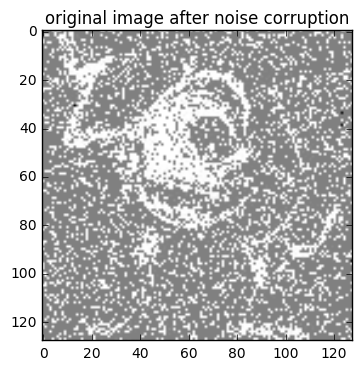

one iteration done


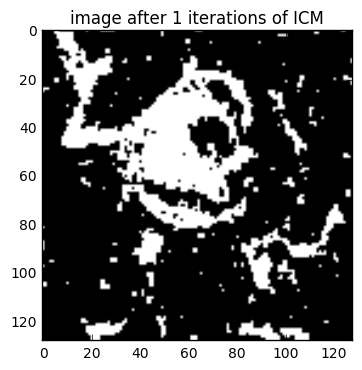

one iteration done


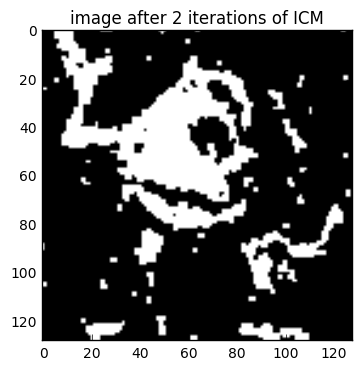

one iteration done


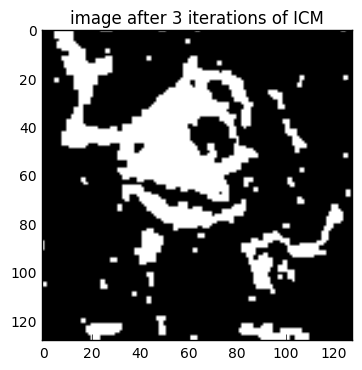

one iteration done


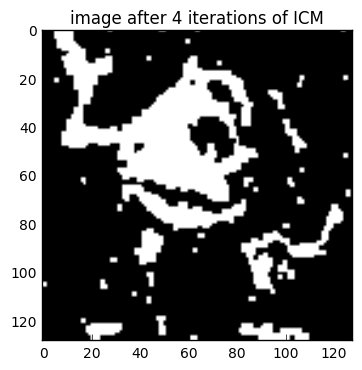

one iteration done


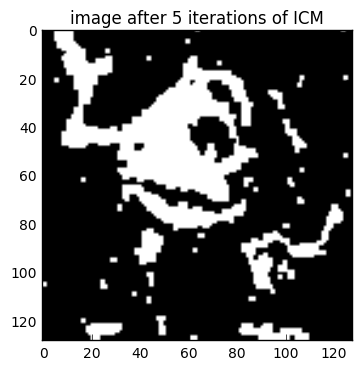

one iteration done


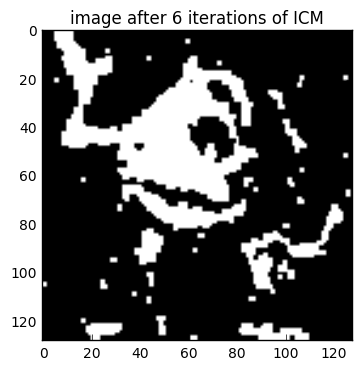

one iteration done


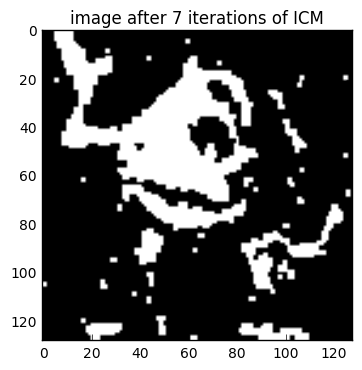

one iteration done


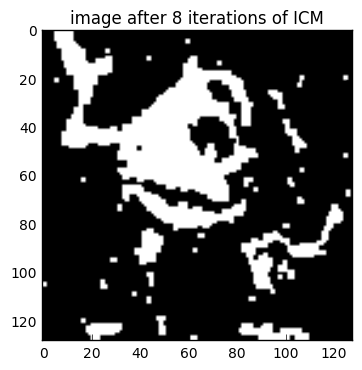

one iteration done


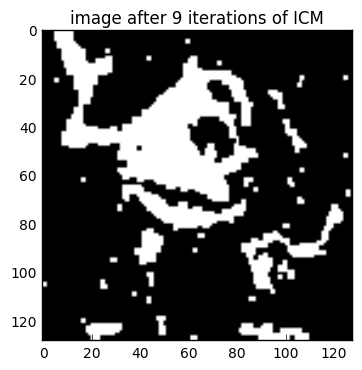

one iteration done


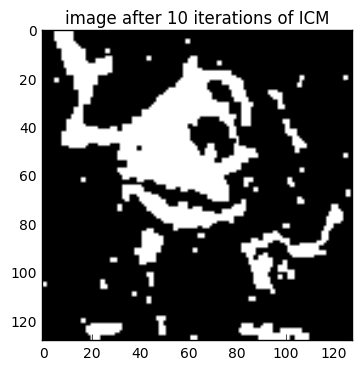

We have completed  10  iterations


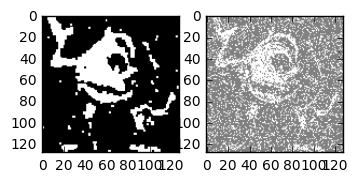

In [30]:
def likeli(image, xImage, point):
    xImage[point] = 1
    multipliedArrayPos = np.multiply(image, xImage)
    arraySumPos = np.sum(multipliedArrayPos)
    
    xImage[point] = -1
    multipliedArrayNeg = np.multiply(image, xImage)
    arraySumNeg = np.sum(multipliedArrayNeg)
    return arraySumPos, arraySumNeg
  
def E0(xImage, point):
    kernel = np.array([[0,1,0],
                       [1,0,1],
                       [0,1,0]])
    xImage[point] = 1
    xConvolvedPos = signal.convolve2d(xImage, kernel, mode='same')
    xMultiplyPos = np.multiply(xImage, xConvolvedPos)
    xSumPos = np.sum(xMultiplyPos)
    xImage[point] = -1
    xConvolvedNeg = signal.convolve2d(xImage, kernel, mode='same')
    xMultiplyNeg = np.multiply(xImage, xConvolvedPos)
    xSumNeg = np.sum(xMultiplyNeg)
    return xSumPos, xSumNeg
    
def prob(image, xImage, point):
    #p(y|x) = e^likeli
    #p(x) = e^E0
    #p(x, y) = p(y|x) * p(x)
    #we scale by a factor of 1000 for ease of calculation.
    #The results are not affected.
    
    L_pos, L_neg = likeli(image, xImage, point)
    E_pos, E_neg = E0(xImage, point)
    pYX_pos, pYX_neg = np.exp(L_pos/1000), np.exp(L_neg/1000)
    pX_pos, pX_neg = np.exp(E_pos/1000), np.exp(E_neg/1000)
    
    pXY_pos, pXY_neg = pYX_pos * pX_pos, pYX_neg * pX_neg
    
    return pXY_pos, pXY_neg

print(likeli(im2, im2, (39, 123)))
print(E0(im2, (95, 127)))
print(E0(im2, (34, 123)))
print(prob(im2, im2, (31, 13)))

def ICM2(image, lim):
    H, W = heightWidth(image)
    X = np.copy(image)
    X[X > 0.5] = 1
    X[X <= 0.5] = -1
    print("initialised latent image = corrupted image")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(im2, cmap='gray')
    ax.set_title("original image after noise corruption")
    plt.show()
    for iterations in range(lim):
        flag = False
        for i in range(H):
            for j in range(W):
                point = (i, j)
                prob_pos, prob_neg = prob(image, X, point)
                if(prob_pos > prob_neg):
                    if(X[point] == -1):
                        X[point] = 1
                        flag = True
                else:
                    if(X[point] == 1):
                        X[point] = -1
                        flag = True
        print("one iteration done")
        fig2 = plt.figure()
        ax2 = fig2.add_subplot(111)
        ax2.imshow(X, cmap='gray')
        title = "image after " + str(iterations+1) + " iterations of ICM"
        ax2.set_title(title)
        plt.show()
        if(flag == False):
            print("bailing early, no changes made")
            break
    print("We have completed ", iterations+1, " iterations")
    
    return X

imFIXED2 = ICM2(im2, 10)

fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(imFIXED2,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')
plt.show()